<a href="https://colab.research.google.com/github/Hi-ImEddy/AIO/blob/feature%2FMO3W02/M03W02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score  # Import thêm để tính độ chính xác

# Load the Iris dataset
iris_X, iris_y = datasets.load_iris(return_X_y=True)

# Split train:test = 8:2
X_train, X_test, y_train, y_test = train_test_split(
    iris_X,
    iris_y,
    test_size=0.2,
    random_state=42
)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)  # Huấn luyện mô hình

# Predict and Evaluate test set
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
#Paragraph A:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

#Paragraph D:
# Split train:test = 8:2
X_train, X_test, y_train, y_test = train_test_split(
diabetes_X,
diabetes_y,
test_size=0.2,
random_state=42
)

#Paragraph B:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Paragraph C:
# Build KNN model
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
# Import library
!pip install -q datasets
import numpy as np
from datasets import load_dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
# Load IMDB dataset
imdb = load_dataset("imdb")
imdb_train, imdb_test = imdb['train'], imdb['test']
# Convert text to vector using BoW
vectorizer = CountVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(imdb_train['text']).toarray()
X_test = vectorizer.transform(imdb_test['text']).toarray()
y_train = np.array(imdb_train['label'])
y_test = np.array(imdb_test['label'])
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Build KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree')
knn_classifier.fit(X_train, y_train)
# predict test set and evaluate
y_pred = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

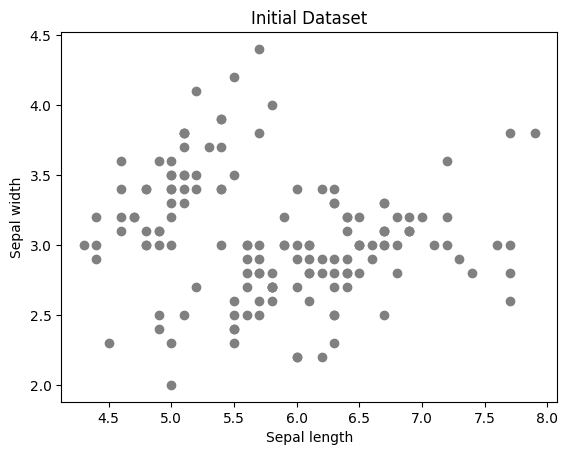

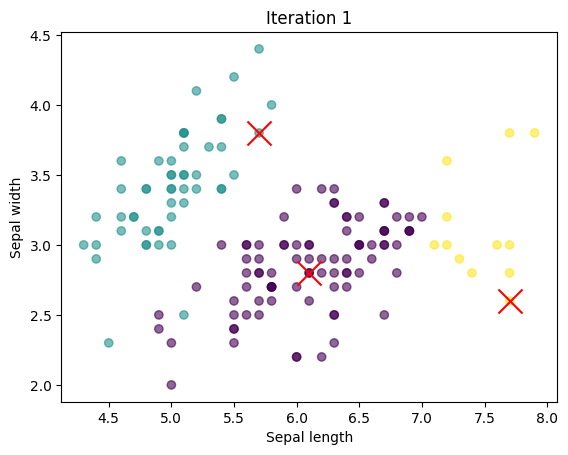

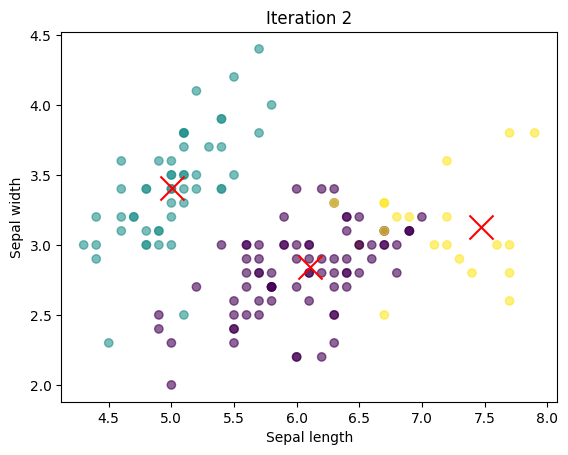

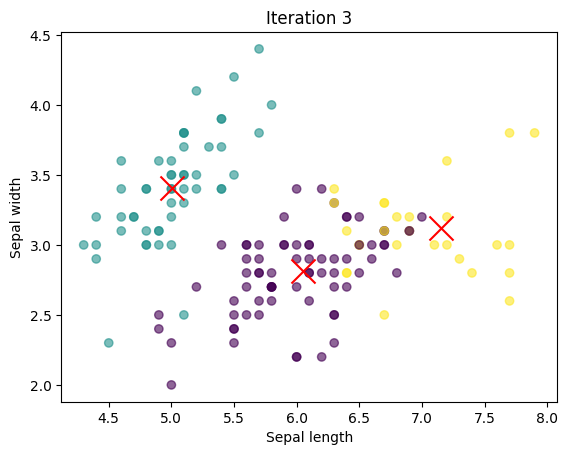

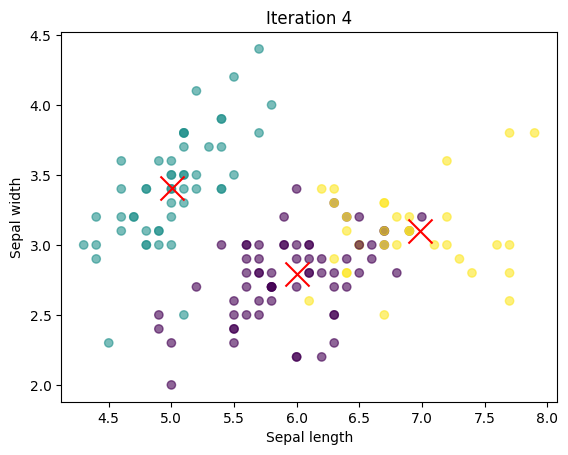

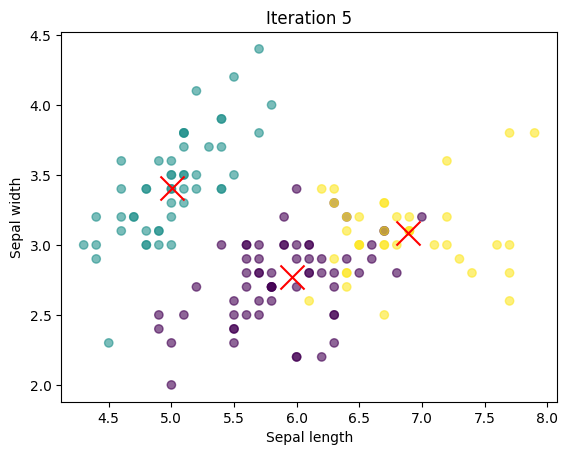

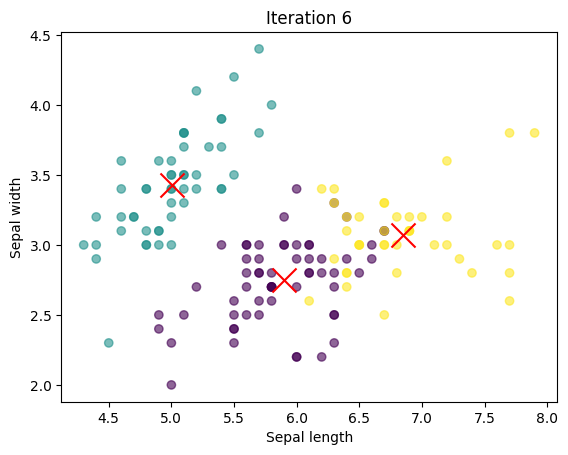

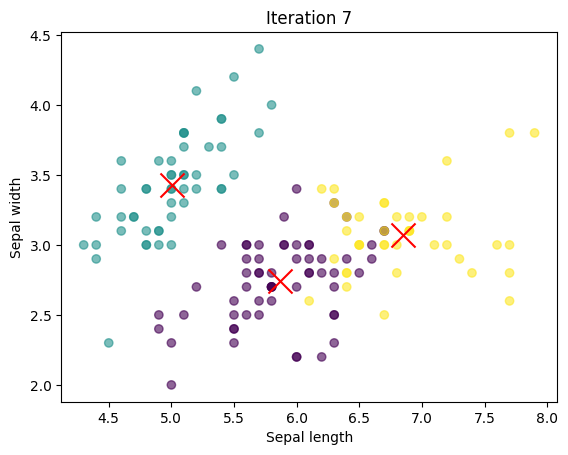

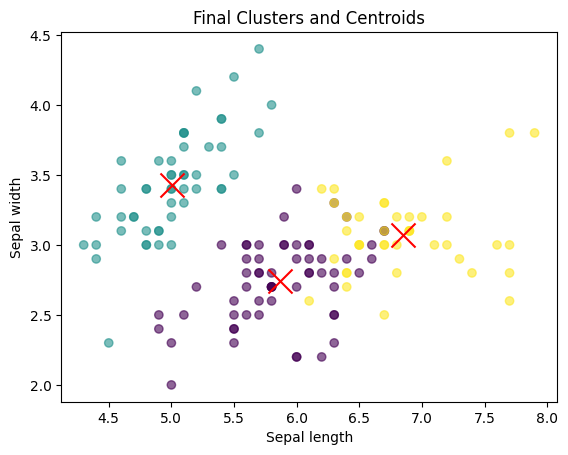

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris_dataset = load_iris()
data = iris_dataset.data
data = data[:, :3]  # Chỉ lấy 2 đặc trưng đầu tiên để hiển thị 2 chiều

# Plot initial data
plt.scatter(data[:, 0], data[:, 1], c='gray')
plt.title("Initial Dataset")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.clusters = None

    def initialize_centroids(self, data):
        np.random.seed(42)  # Đảm bảo tái lập kết quả
        self.centroids = data[np.random.choice(data.shape[0], self.k, replace=False)]

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum(np.power(x1 - x2, 2)))

    def assign_clusters(self, data):
        distances = np.array([[self.euclidean_distance(x, centroid) for centroid in self.centroids] for x in data])
        return np.argmin(distances, axis=1)

    def update_centroids(self, data):
        return np.array([data[self.clusters == i].mean(axis=0) for i in range(self.k)])

    def fit(self, data):
        self.initialize_centroids(data)

        for i in range(self.max_iters):
            self.clusters = self.assign_clusters(data)
            self.plot_clusters(data, i)

            new_centroids = self.update_centroids(data)

            # Kiểm tra điều kiện dừng
            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

        self.plot_final_clusters(data)

    def plot_clusters(self, data, iteration):
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c='red', marker='x')
        plt.title(f"Iteration {iteration + 1}")
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.show()

    def plot_final_clusters(self, data):
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c='red', marker='x')
        plt.title("Final Clusters and Centroids")
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.show()

# Khởi tạo đối tượng KMeans và chạy thuật toán
kmeans = KMeans(k=3)
kmeans.fit(data)
